# Assignment 2 - Filters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
# this line is needed to display the plots and images inline on the notebook
%matplotlib inline 

## Low-pass filters
Load the test image sand_bilevel.png and add Gaussian noise $\mathcal{N}$(0,0.25).

### Exercise 1
Test filter performance of different image filters:
* Box (3$\times$3, 5$\times$5, 7$\times$7)
* Gauss $\sigma$=1,2,3



### Step 1: Prepare test image

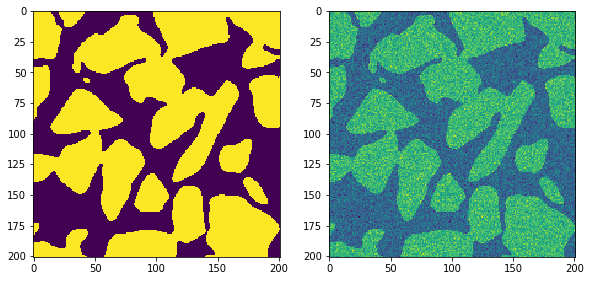

In [12]:
original = plt.imread('sand_bilevel.png').astype('double') # add you loadning code here
noisy    = original + np.random.normal(0,0.25,original.shape) # add the Gaussian noise
plt.figure(figsize=[15,7])
plt.subplot(1,3,1)
plt.imshow(original)
plt.subplot(1,3,2)
plt.imshow(noisy)

### Step 2: Apply box filters to the test data
Box filters are computed using the function
b = ndimage.filters.uniform_filter(img,[N,N])

* img the image to filter
* N kernel size
* b resulting image

Apply the box filter on your test image with N=(3$\times$3, 5$\times$5, 7$\times$7)

It is recommended to use plt.subplot to save space on screen

#### Solution 1 boxfilter

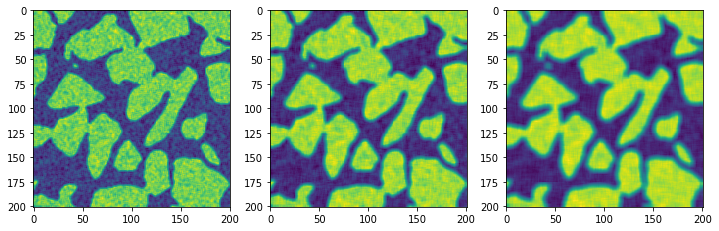

In [13]:
# your code here
plt.figure(figsize=[12,5])
NN=[3,5,7]
for idx,N in enumerate(NN) :
    plt.subplot(1,3,idx+1)
    plt.imshow(ndimage.filters.uniform_filter(noisy,size=[N,N]))

### Step 3: Gauss filter
Gauss filters are computed using the function
g = ndimage.filters.gaussian_filter(img,sigma=s)

* img the image to filter
* s is the width of the kernel
* g resulting image

Apply Gauss filters with $\sigma$=1,2,3

It is recommended to use plt.subplot to save space

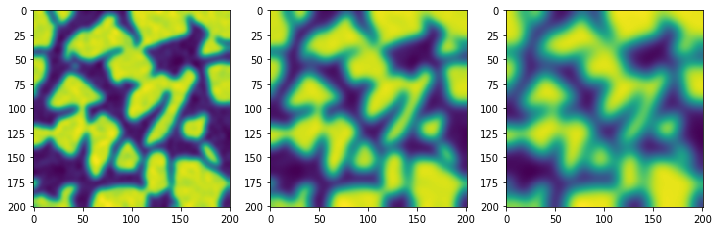

In [14]:
# your code here
plt.figure(figsize=[12,5])
nsig=[3,5,7]
for idx,sigma in enumerate(nsig) :
    plt.subplot(1,3,idx+1)
    plt.imshow(ndimage.filters.gaussian_filter(noisy,sigma=sigma))

## Separable kernels
### Exercise 2 
Compare (subtract) how well separation of a kernel works. Use box filters 3$\times$3 and 7$\times$7. 

You need to call ndimage.filters.uniform_filter twice once with [N,1] and once with [1,N]

* How well does it match visually
* Is there a numeric difference, why?

#### Solution exercise 2

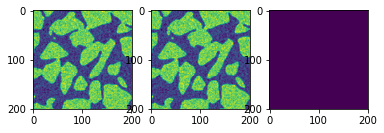

In [15]:
# your code here
f3=ndimage.filters.uniform_filter(noisy,size=[3,3])
f3s=ndimage.filters.uniform_filter(ndimage.filters.uniform_filter(noisy,size=[3,1]),size=[1,3])
plt.subplot(1,3,1)
plt.imshow(f3)
plt.subplot(1,3,2)
plt.imshow(f3s)
plt.subplot(1,3,3)
plt.imshow(f3-f3s)


In [16]:
(f3-f3s).max()

0.0

1. Visually the images look very similar
2. The difference is mainly due to the numeric precision if single or ints are used

## Gradients

Now we want to test the accuracy of two gradient kernels. To do
this create a 1001$\times$ 1001 image representing

$f(x,y)=\sin(x^2+y^2),\qquad -5\leq x,\,y\leq 5$

This will be our test image. Compute the analytical gradient of
$f(x,y)$:

$\nabla\,f=\left[\begin{array}{cc}\frac{\partial}{\partial x}f &
\frac{\partial}{\partial y}f\end{array}\right]$

and create an image containing the argument of the gradient (use
atan2), this will be our reference image.

In [ ]:
# your code here

Now create the filter kernels for

$G1_x={G1_y}^T=\frac{1}{2}\left[\begin{array}{cc} -1 & 1\end{array}\right]$

and the gradient according to Jähne

$G2_y={G2_x}^T=\frac{1}{32}\left[\begin{array}{ccc} -3 &-10& -3\\0&
0 &0\\3 &10& 3\end{array}\right]$

### Exercise 3
Filter the test image with the kernels and compute the argument.
Compare the argument with the true argument image. You might need
to change the color axis with caxis. Conclusion?

In [ ]:
# your code here

## Gradient performance with noisy images
Use the noisy image you created for low pass filter images. Compute the
gradient of the image. As you will see is the gradient sensitive
to noise. To avoid this can a low-pass filter be applied before
computing the gradient.

Now compute the Laplacian of a smoothed image

$g=\triangle(G_{\sigma}*(f+n))$

Where $G_{\sigma}$ is a Gaussian kernel with width $\sigma$  and $n$ is the noise component, use Gaussian noise.

### Exercise 4
Implement this filter with the gradient defined by Jähne and try the performance with
different $\sigma$. What happens when $\sigma$ is small? See what happens when the SNR decreases. 

In [ ]:
# your code here